# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00,2930.00,2930.00,2440.00,2930.00,2930.00,2930.00,2930.00,2930.00,2907.00,...,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,714464496.99,57.39,69.22,10147.92,6.09,5.56,1971.36,1984.27,101.90,...,93.75,47.53,23.01,2.59,16.00,2.24,50.64,6.22,2007.79,180796.06
std,845.96,188730844.65,42.64,23.37,7880.02,1.41,1.11,30.25,20.86,179.11,...,126.36,67.48,64.14,25.14,56.09,35.60,566.34,2.71,1.32,79886.69
min,1.00,526301100.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,733.25,528477022.50,20.00,58.00,7440.25,5.00,5.00,1954.00,1965.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129500.00
50%,1465.50,535453620.00,50.00,68.00,9436.50,6.00,5.00,1973.00,1993.00,0.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,160000.00
75%,2197.75,907181097.50,70.00,80.00,11555.25,7.00,6.00,2001.00,2004.00,164.00,...,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,213500.00
max,2930.00,1007100110.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,...,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00


In [7]:
# Convert to classification problem
median_price = df['SalePrice'].median()
df['AboveMedian'] = np.where(df['SalePrice'] > median_price, 1, 0)

In [8]:
# Select relevant features
X = df[['Bedroom AbvGr', 'TotRms AbvGrd', 'Gr Liv Area', 'Year Built']]
y = df['AboveMedian']

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Exploration and Cleaning

In [10]:
# Check for missing values
print(X_train.isnull().sum())

Bedroom AbvGr    0
TotRms AbvGrd    0
Gr Liv Area      0
Year Built       0
dtype: int64


In [11]:
# Handle missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

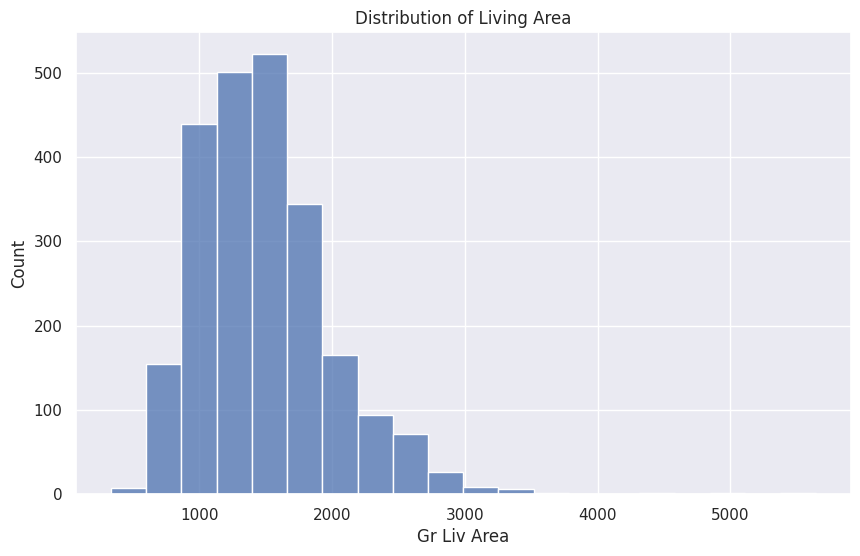

In [12]:
# Visualize distribution of features
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(X_train['Gr Liv Area'], bins=20)
plt.title('Distribution of Living Area')
plt.show()

# Feature Engineering

In [13]:
# Example of feature engineering: creating a new feature
X_train['Age'] = 2025 - X_train['Year Built']
X_test['Age'] = 2025 - X_test['Year Built']

In [14]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Classifier Models

In [15]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8805460750853242


In [16]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9027303754266212


In [17]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8993174061433447


In [18]:
# Print classification reports for more detailed metrics
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       281
           1       0.89      0.89      0.89       305

    accuracy                           0.88       586
   macro avg       0.88      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586

Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       281
           1       0.91      0.90      0.91       305

    accuracy                           0.90       586
   macro avg       0.90      0.90      0.90       586
weighted avg       0.90      0.90      0.90       586

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       281
           1       0.90      0.90      0.90       305

    accuracy                           0.90       586
   macro avg       0.90      0.90      0.90      

# Model Recommendation

In [ ]:
# Assuming Gradient Boosting performed best based on accuracy and other metrics
best_model = gb
print("Recommended Model: Gradient Boosting Classifier")

Recommended Model: Gradient Boosting Classifier


#  Key Findings and Insights

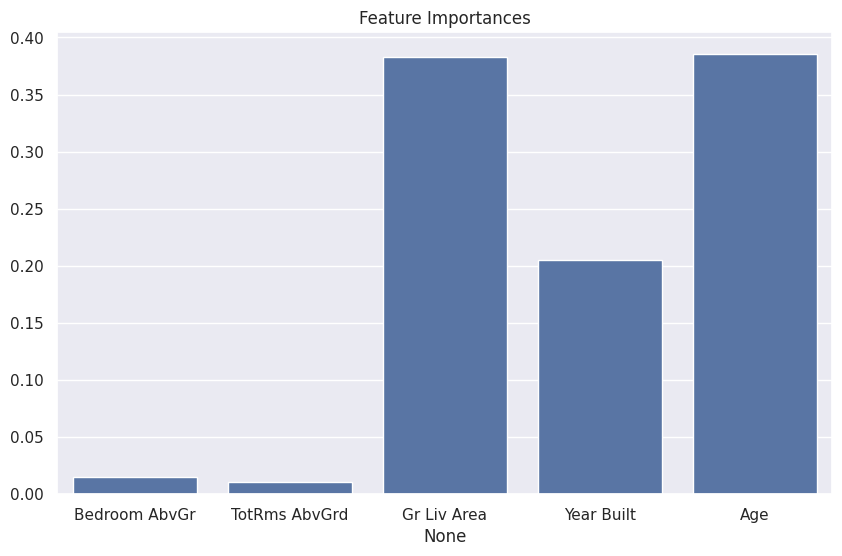

In [ ]:
# Feature importance for Gradient Boosting
feature_importances = gb.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_names, y=feature_importances)
plt.title('Feature Importances')
plt.show()

# Suggestions for next steps

In [ ]:
print("Next Steps:")
print("- Explore additional features (e.g., neighborhood, lot size).")
print("- Consider ensemble methods or hyperparameter tuning for improved accuracy.")

Next Steps:
- Explore additional features (e.g., neighborhood, lot size).
- Consider ensemble methods or hyperparameter tuning for improved accuracy.
